In [319]:
import pandas as pd
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
# stop_words = stopwords.words('english')

import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [321]:
train_data = pd.read_csv('news_data.csv', encoding='latin-1')

In [322]:
df = pd.DataFrame(train_data)

In [323]:
df.head(5)

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [324]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'message'})

In [325]:
df.head(5)

,sentiment,message
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [326]:
X = df['message']
y = df['sentiment']

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   message    4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [328]:
y.value_counts(normalize=True)

neutral     0.594014
positive    0.281321
negative    0.124665
Name: sentiment, dtype: float64

### Check null values

In [329]:
df.isnull().sum()

sentiment    0
message      0
dtype: int64

### Check number of neutral, positive, and negative  messages

<Axes: >

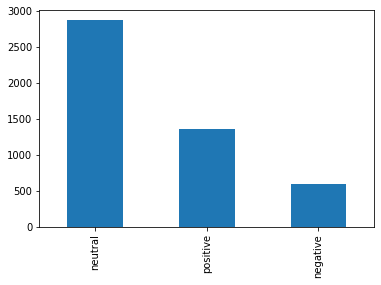

In [330]:
y.value_counts().plot.bar()

### Train-Test Split

In [331]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### NB (Multinomial)

In [332]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

steps = [('tfidf',TfidfVectorizer()),
         ('mnb', MultinomialNB(alpha=1e-03))]
         
mnb_pipeline = Pipeline(steps)
mnb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('mnb', MultinomialNB(alpha=0.001))])

In [333]:
# mnb_pipeline = MultinomialNB()
# mnb_pipeline.fit(X_test, y_test)
# y_pred = mnb_pipeline.predict(X_test)
# print(accuracy_score(y_test,y_pred)*100)

In [334]:
# print(classification_report(y_test, y_pred))

In [335]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

ypred_test = mnb_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test) 
report_clf = classification_report(y_test, ypred_test) 

print(mat_clf)
print(report_clf)

[[ 93  97  40]
 [ 44 971 138]
 [ 57 253 245]]
              precision    recall  f1-score   support

    negative       0.48      0.40      0.44       230
     neutral       0.74      0.84      0.78      1153
    positive       0.58      0.44      0.50       555

    accuracy                           0.68      1938
   macro avg       0.60      0.56      0.57      1938
weighted avg       0.66      0.68      0.66      1938

